# Rozkłady prawdopodobieństwa, a testowanie hipotez

Aby zilustrować związek pomiędzy <b> rozkładami prawdopodobieństwa</b>, a <b> testowaniem hipotez </b>, rozważmy następujący problem:

<ul>
<li> Średnia masa noworodków w USA wynosi $3.5$ kg, przy odchyleniu standardowym $0.76$ kg. 
<li> Załóżmy, że chcemy znaleźć wszystkie dzieci znacznie różniące się od normy (aby móc monitorować ich rozwój). 
<li> Co zrobić z dzieckiem, które urodziło się z wagą $2.6$ kg?
<li> Możemy wypowiedzieć ten problem w formie testu hipotez:  
<ul>
<li> nasza hipoteza mówi, że dziecko pochodzi z populacji ``zdrowych'' niemowląt. </li>
<li> czy możemy odrzucić hipotezę, czy też ciężar dziecka sugeruje, że nie ma podstaw do odrzucenia takiej hipotezy?</li>
</ul>
</ul>

Aby odpowiedzieć na to pytanie, możemy postępować w następujący sposób:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

Zdefiniujmy zmienną losową o rozkładzie Normalnym z parametrami $\mu=3.5$, $\sigma=0.76$

In [4]:
md, sd = 3.5, 0.76
nd = stats.norm(md, sd)
print(nd)

Znajdź dystrybuantę (CDF) tej zmiennej losowej  oraz wyznacz $CDF(2.6)$.

Innymi słowy, prawdopodobieństwo, że zdrowe dziecko jest co najmniej o $0.9$ kg lżejsze od przeciętnego dziecka:
$$
P(X<2.6)=CDF(2,6)=0.118.
$$

In [5]:
# Shade the regions beyond a certain "checkVal"
checkVal = 2.6
print('p = {0:5.3f}'.format(nd.cdf(checkVal)))

p = 0.118


# Zadanie 1
Zilustruj taką sytuację na rysunku przedstawiającym gęstość i dystrybuantę rozkładu normalnego o parametrach $\mu=3.5$, $\sigma=0.76$.

In [7]:
(mu, sigma)=(3.5,0.76)
nd=stats.norm(mu, sigma)
p = 0.118

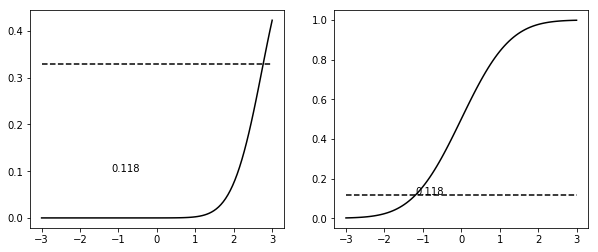

In [13]:
x = np.linspace(-3,3,100)
yp = nd.pdf(x)
x1 = np.linspace(-3, stats.norm.ppf(p))
y1 = nd.pdf(x1)
yp2=stats.norm.cdf(x)
yp3 = stats.norm.ppf(x, loc=mu, scale=sigma)

figs, axs = plt.subplots(1,2, figsize=(10, 4))
#gestosc
axs[0].plot(x,yp, 'k')
axs[0].text( stats.norm.ppf(p), 0.1, p)
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].hlines(0.33, -3, 3, linestyles='--')
# dystrybuanta
axs[1].plot(x,yp2, 'k')
axs[1].text( stats.norm.ppf(p), p,p)
axs[1].hlines(p, -3, 3, linestyles='--')
plt.show()

# Zadanie 2
My zakładamy, że zjawisko to jest modelowane rozkładem normalny więc prawdopodobieństwo, że zdrowe dziecko jest co najmniej o $0.9$ kg cięższe od przeciętnego dziecka, wynosi również $11.8\%$.

Jeśli dziecko jest zdrowe, prawdopodobieństwo, że jego masa odbiega o co najmniej $0.9$ kg od średniej wynosi $2 \cdot 11,8\% = 23,6\%=0.236$. 

To nie jest znaczące, więc nie mamy wystarczających dowodów na odrzucenie naszej hipotezy, a nasze dziecko uważa się za zdrowe.

Zilustruj taką sytuację na rysunku przedstawiającym gęstość i dystrybuantę rozkładu normalnego o parametrach $\mu=3.5$, $\sigma=0.76$.

0.1182


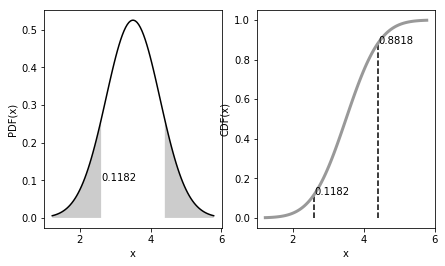

0.236329736314


# Zadanie 3
Czy w powyzszych rozwiązaniach można użyć funkcji <tt>nd.sf</tt>?

$$
SF(x)=1-CDF(x).
$$

Jeżeli tak to zrób to.